In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import Tensor
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from sklearn import metrics
from google.colab import drive


From this [page](https://drive.google.com/drive/folders/1gsc79_4DkrJtWRlxWXSZSxNHV5LZDKg4?usp=sharing) you can find the FER2013 dataset and all H5 files. You have to download the directory and insert into your Goggle Drive and than you can execute this notebook.

In [16]:
drive.mount('/content/drive')

file = '/content/drive/My Drive/VCSproject/fer20131.csv'
df = pd.read_csv(file)
df.head(10)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


Text(0.5, 1.0, 'Distribution of emotions,(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprised, 6=Neutral)')

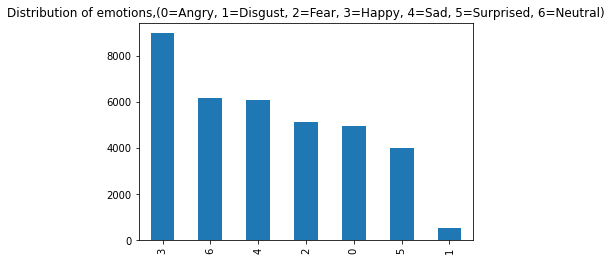

In [17]:
import matplotlib.pyplot as plt
df['emotion'].value_counts().plot(kind='bar')
plt.title("Distribution of emotions,(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprised, 6=Neutral)")

(35887, 3)
(35887, 3)


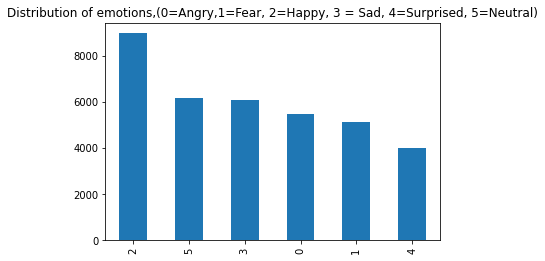

In [18]:
print(df.shape)
df['emotion'] = df['emotion'].map( {0:0, 1:0, 2:1, 3:2, 4:3, 5:4, 6:5} ).astype(int)
df['emotion'].value_counts().plot(kind='bar')
plt.title("Distribution of emotions,(0=Angry,1=Fear, 2=Happy, 3 = Sad, 4=Surprised, 5=Neutral)")
print(df.shape)

(52025, 3)


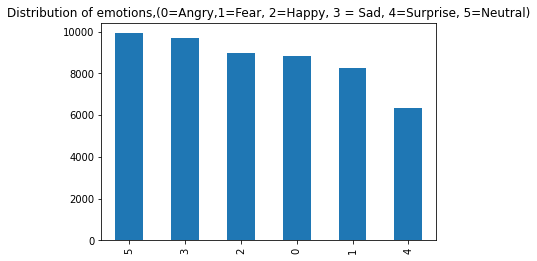

In [19]:
from sklearn.utils import shuffle

#As there are higher number of 'Happy' images, making copies of other images
df_copy = df[df['emotion'] != 2]
df_copy = df_copy[:int(0.6*len(df_copy.index))]
len(df_copy.index)
new_df = shuffle(pd.concat([df,df_copy]))

new_df['emotion'].value_counts().plot(kind='bar')
plt.title("Distribution of emotions,(0=Angry,1=Fear, 2=Happy, 3 = Sad, 4=Surprise, 5=Neutral)")
print(new_df.shape)

In [20]:
# images are 48x48
# N = 35887
X_train, X_test, X_val, y_train, y_test, y_val = [], [], [], [], [], []
#df = df[df.Usage == "Training"]
print(new_df.shape)
#first = True
for index, row in new_df.iterrows():
    if(row[2] == "Training"):
        y_train.append(int(row[0]))
        X_train.append([int(p) for p in row[1].split()])
    elif(row[2] == "PrivateTest"):
        y_test.append(int(row[0]))
        X_test.append([int(p) for p in row[1].split()])
    elif(row[2] == "PublicTest"):
        y_val.append(int(row[0]))
        X_val.append([int(p) for p in row[1].split()])

#standardization
X_train_st = np.array(X_train)
X_test_st = np.array(X_test)
X_val_st = np.array(X_val)
X_train_st = X_train_st.reshape(X_train_st.shape[0], 48, 48, 1)
X_test_st = X_test_st.reshape(X_test_st.shape[0], 48, 48, 1)
X_val_st = X_val_st.reshape(X_val_st.shape[0], 48, 48, 1)
#secondo navarin usare X_train_st per calcolare mean e std
X_train_st = (X_train_st-np.mean(X_train_st, axis=0))/np.std(X_train_st,axis=0)
X_test_st = (X_test_st-np.mean(X_train_st, axis=0))/np.std(X_train_st,axis=0)
X_val_st = (X_val_st-np.mean(X_train_st, axis=0))/np.std(X_train_st,axis=0)


#normalization
X_train_norm = np.array(X_train) / 255.0
X_test_norm = np.array(X_test) / 255.0
X_val_norm = np.array(X_val) / 255.0
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

'''#X = X.astype("float32")
#X /= 255
#Y = to_categorical(Y)
num_class = len(set(Y))
print(num_class)'''

X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], 48, 48, 1)
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], 48, 48, 1)
X_val_norm = X_val_norm.reshape(X_val_norm.shape[0], 48, 48, 1)


(52025, 3)


In [21]:
y_train = (np.arange(len(set(y_train))) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(len(set(y_test))) == y_test[:, None]).astype(np.float32)
y_val = (np.arange(len(set(y_val))) == y_val[:, None]).astype(np.float32)
print("st shapes")
print(X_train_st.shape)
print(X_test_st.shape)
print(X_val_st.shape)
print("norm shapes")
print(X_train_norm.shape)
print(X_test_norm.shape)
print(X_val_norm.shape)
print("y shapes")
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

st shapes
(44847, 48, 48, 1)
(3589, 48, 48, 1)
(3589, 48, 48, 1)
norm shapes
(44847, 48, 48, 1)
(3589, 48, 48, 1)
(3589, 48, 48, 1)
y shapes
(44847, 6)
(3589, 6)
(3589, 6)


# OLDNET

In [22]:
def old_net(input_layer): #confirmed old_model.h5
    modelN = keras.Sequential()
    modelN.add(input_layer)
    modelN.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    modelN.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    modelN.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    modelN.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
    modelN.add(keras.layers.Dropout(0.25))#io
    modelN.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    modelN.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    modelN.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    modelN.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
    modelN.add(keras.layers.Dropout(0.4))#io
    modelN.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    modelN.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    modelN.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    modelN.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
    modelN.add(keras.layers.Dropout(0.3))#io
    modelN.add(keras.layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
    modelN.add(keras.layers.Dense(64, activation='relu'))
    modelN.add(keras.layers.Dense(64, activation='relu'))
    modelN.add(keras.layers.Dense(6, activation='softmax'))
    modelN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return modelN

# VGG-B [24]

In [23]:
def vgg_v0(input_layer): #confirmed m_vgg16_ADAM64_512
    model = tf.keras.Sequential()
    model.add(input_layer)
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Dropout(0.6))
    model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Dropout(0.8))
    model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(tf.keras.layers.Dense(25, activation='relu')) # era 4096 ma penso sia proporzionale al n.classi => 1000:4096=6:x => x=25
    model.add(tf.keras.layers.Dense(25, activation='relu'))
    
    model.add(tf.keras.layers.Dense(6, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def vgg_v1(input_layer): #confirmed for v1 e v2 non so che cambia
    model = tf.keras.Sequential()
    model.add(input_layer)
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', data_format='channels_last', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors

    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    
    model.add(tf.keras.layers.Dense(6, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def vgg_aut_v4(input_layer): #confirmed
  num_features = 64
  model = tf.keras.Sequential()

  model.add(tf.keras.layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1), data_format='channels_last', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
  model.add(tf.keras.layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.5))

  model.add(tf.keras.layers.Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.5))

  model.add(tf.keras.layers.Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.5))

  model.add(tf.keras.layers.Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.5))

  model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(2*2*2*num_features, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(2*2*num_features, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(2*num_features, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))

  model.add(tf.keras.layers.Dense(6, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# INCEPTION

In [24]:
# occhio che c'è la L2
def inception(inp,n,name): #confirmed  m_inception_v0
  conv_1x1 = tf.keras.layers.Conv2D((3/4)*n, (1,1), padding='same', activation='relu', name=name+'_conv_1x1',kernel_regularizer=tf.keras.regularizers.l2(0.0002))(inp)

  conv_3x3_reduce = tf.keras.layers.Conv2D((1/2)*n, (1,1), padding='same', activation='relu', name=name+'_conv_1x1_3x3_reduce',kernel_regularizer=tf.keras.regularizers.l2(0.0002))(inp)
  conv_3x3_reduce = tf.keras.layers.Conv2D((1/2)*n, (3,3), padding='same', activation='relu', name=name+'_conv_3x3_reduce',kernel_regularizer=tf.keras.regularizers.l2(0.0002))(conv_3x3_reduce) # forse qui è n?

  conv_5x5_reduce = tf.keras.layers.Conv2D((1/8)*n, (1,1), padding='same', activation='relu', name=name+'_conv_1x1_5x5_reduce',kernel_regularizer=tf.keras.regularizers.l2(0.0002))(inp)
  conv_5x5_reduce = tf.keras.layers.Conv2D((1/8)*n, (5,5), padding='same', activation='relu', name=name+'_conv_5x5_reduce',kernel_regularizer=tf.keras.regularizers.l2(0.0002))(conv_5x5_reduce) # forse qui è n?

  conv_5x5 = tf.keras.layers.Conv2D((1/4)*n, (5,5), padding='same', activation='relu', name=name+'_conv_5x5',kernel_regularizer=tf.keras.regularizers.l2(0.0002))(inp)

  pool_proj = tf.keras.layers.MaxPool2D((3,3), strides=(1,1), padding='same', name=name+'_pool_proj')(inp)
  pool_proj = tf.keras.layers.Conv2D((1/4)*n, (1,1), padding='same', activation='relu', name=name+'_conv_1x1_pool_proj',kernel_regularizer=tf.keras.regularizers.l2(0.0002))(pool_proj)

  output = tf.keras.layers.concatenate([conv_1x1, conv_3x3_reduce, conv_5x5_reduce, conv_5x5, pool_proj], axis = 3)
  
  return output

def inception_model(input_layer):
  Inception1 = inception(input_layer,32,"1")
  maxpool = tf.keras.layers.MaxPool2D((3,3), strides=2, padding='same', name='maxpool_1')(Inception1)
  Inception2a = inception(maxpool,64,"2a")
  Inception2b = inception(Inception2a,96,"2b")
  maxpool = tf.keras.layers.MaxPool2D((3,3), strides=2, padding='same', name='maxpool_2')(Inception2b)

  Inception3a = inception(maxpool,128,"3a")
  Inception3b = inception(Inception3a,160,"3b")
  maxpool = tf.keras.layers.MaxPool2D((3,3), strides=2, padding='same', name='maxpool_3')(Inception3b)

  Inception4a = inception(maxpool,192,"4a")
  Inception4b = inception(Inception4a,224,"4b")

  avgpool = tf.keras.layers.AveragePooling2D(pool_size=(3,3), strides=(1,1), name='avgpool')(Inception4b) 
  flatten = tf.keras.layers.Flatten()(avgpool)
  dropout = tf.keras.layers.Dropout(rate=0.4)(flatten)
  output = tf.keras.layers.Dense(6, activation='softmax', name='dense_inception')(dropout)

  model = tf.keras.models.Model(input_layer, output, name='inception')
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# RESNET

In [25]:
def relu_bn(inputs: tf.Tensor) -> tf.Tensor: # v0 v3 come v0 ma con 64 
    relu = tf.keras.layers.ReLU()(inputs)
    bn = tf.keras.layers.BatchNormalization()(relu)
    return bn

def residual_block(x: tf.Tensor, downsample: bool, filters: int, kernel_size: int = 3) -> tf.Tensor:
    y = tf.keras.layers.Conv2D(kernel_size=kernel_size, strides= (1 if not downsample else 2), filters=filters, padding="same")(x)
    y = relu_bn(y)
    y = tf.keras.layers.Conv2D(kernel_size=kernel_size, strides=1, filters=filters, padding="same")(y)

    if downsample:
        x = tf.keras.layers.Conv2D(kernel_size=1, strides=2, filters=filters, padding="same")(x)
    out = tf.keras.layers.Add()([x, y])
    out = relu_bn(out)
    return out

def create_res_net(input_layer, starting_filters, block_list):
    
    #input_layer = tf.keras.layers.Input(shape=(48,48,1))
    num_filters = starting_filters

    t = tf.keras.layers.BatchNormalization()(input_layer)
    t = tf.keras.layers.Conv2D(kernel_size=3,strides=1,filters=num_filters,padding="same")(t)
    t = relu_bn(t)
    
    #num_blocks_list = [2,5,5,2] or [3,4,6,3]
    num_blocks_list = block_list
    for i in range(len(num_blocks_list)):
        num_blocks = num_blocks_list[i]
        for j in range(num_blocks):
            t = residual_block(t, downsample=(j==0 and i!=0), filters=num_filters)
        num_filters *= 2
    
    t = tf.keras.layers.AveragePooling2D(4)(t)
    t = tf.keras.layers.Flatten()(t)
    outputs = tf.keras.layers.Dense(6, activation='softmax')(t)
    
    model = tf.keras.models.Model(input_layer, outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [26]:
model_input = tf.keras.layers.Input(shape=(48,48,1))

m_old = old_net(model_input)
m_old._name="m_old"
print(m_old._name)
m_vgg_v0 = vgg_v0(model_input)
m_vgg_v0._name="m_vgg_v0"
m_vgg_v1 = vgg_v1(model_input)
m_vgg_v1._name="m_vgg_v1"
m_vgg_v2 = vgg_v1(model_input)
m_vgg_v2._name="m_vgg_v2"
m_vgg_v3 = vgg_v1(model_input)
m_vgg_v3._name="m_vgg_v3"
m_vgg_aut_v4 = vgg_aut_v4(model_input)
m_vgg_aut_v4._name="m_vgg_aut_v4"
m_inception = inception_model(model_input)
m_inception._name="m_inception"
m_resnet_v0 = create_res_net(model_input, 32 , [3,4,6,3]) #v0
m_resnet_v0._name="m_resnet_v0"
m_resnet_v2 = create_res_net(model_input, 64 , [2,5,5,2]) #v2
m_resnet_v2._name="m_resnet_v2"
m_resnet_v3 = create_res_net(model_input, 64 , [3,4,6,3]) #v3
m_resnet_v3._name="m_resnet_v3"
m_resnet_v4 = create_res_net(model_input, 64 , [3,4,6,3]) #v4
m_resnet_v4._name="m_resnet_v4"


m_old.load_weights('/content/drive/My Drive/VCSproject/old_model.h5')
scores = m_old.evaluate(X_val_norm, y_val, verbose=2)
print("old_model")
print("%s: %.2f%%" % (m_old.metrics_names[1], scores[1]*100))
#m_old.save("/content/modelli/m_old.h5")

m_vgg_v0.load_weights('/content/drive/My Drive/VCSproject/m_vgg16_ADAM64_512.h5')
scores = m_vgg_v0.evaluate(X_val_norm, y_val, verbose=2)
print("m_vgg_v0")
print("%s: %.2f%%" % (m_vgg_v0.metrics_names[1], scores[1]*100))
#m_vgg_v0.save("/content/modelli/m_vgg_v0.h5")

m_vgg_v1.load_weights('/content/drive/My Drive/VCSproject/vgg_64_lrred_earlyst_checkp.h5')
scores = m_vgg_v1.evaluate(X_val_norm, y_val, verbose=2)
print("m_vgg_v1")
print("%s: %.2f%%" % (m_vgg_v1.metrics_names[1], scores[1]*100))
#m_vgg_v1.save("/content/modelli/m_vgg_v1.h5")

m_vgg_v2.load_weights('/content/drive/My Drive/VCSproject/vgg_64_lrred_v2_earlyst_checkp.h5')
scores = m_vgg_v2.evaluate(X_val_norm, y_val, verbose=2)
print("m_vgg_v2")
print("%s: %.2f%%" % (m_vgg_v2.metrics_names[1], scores[1]*100))
#m_vgg_v2.save("/content/modelli/m_vgg_v2.h5")

m_vgg_v3.load_weights('/content/drive/My Drive/VCSproject/vgg_64_lrred_v3_earlyst_checkp.h5')
scores = m_vgg_v3.evaluate(X_val_norm, y_val, verbose=2)
print("m_vgg_v3")
print("%s: %.2f%%" % (m_vgg_v3.metrics_names[1], scores[1]*100))
#m_vgg_v3.save("/content/modelli/m_vgg_v3.h5")

m_vgg_aut_v4.load_weights('/content/drive/My Drive/VCSproject/new_model_v3.h5')
scores = m_vgg_aut_v4.evaluate(X_val_norm, y_val, verbose=2)
print("m_vgg_aut_v4")
print("%s: %.2f%%" % (m_vgg_aut_v4.metrics_names[1], scores[1]*100))
#m_vgg_aut_v4.save("/content/modelli/m_vgg_aut_v4.h5")

m_inception.load_weights('/content/drive/My Drive/VCSproject/m_inception_v0.h5')
scores = m_inception.evaluate(X_val_norm, y_val, verbose=2)
print("m_inception")
print("%s: %.2f%%" % (m_inception.metrics_names[1], scores[1]*100))
#m_inception.save("/content/modelli/m_inception.h5")

m_resnet_v0.load_weights('/content/drive/My Drive/VCSproject/m_resnet_st_v0_150ep_newfrommedium.h5')
scores = m_resnet_v0.evaluate(X_val_norm, y_val, verbose=2)
print("m_resnet_v0")
print("%s: %.2f%%" % (m_resnet_v0.metrics_names[1], scores[1]*100))
#m_resnet_v0.save("/content/modelli/m_resnet_v0.h5")

m_resnet_v2.load_weights('/content/drive/My Drive/VCSproject/m_resnet_v2.h5')
scores = m_resnet_v2.evaluate(X_val_norm, y_val, verbose=2)
print("m_resnet_v2")
print("%s: %.2f%%" % (m_resnet_v2.metrics_names[1], scores[1]*100))
#m_resnet_v2.save("/content/modelli/m_resnet_v2.h5")

m_resnet_v3.load_weights('/content/drive/My Drive/VCSproject/m_resnet_v3.h5')
scores = m_resnet_v3.evaluate(X_val_norm, y_val, verbose=2)
print("m_resnet_v3")
print("%s: %.2f%%" % (m_resnet_v3.metrics_names[1], scores[1]*100))
#m_resnet_v3.save("/content/modelli/m_resnet_v3.h5")

m_resnet_v4.load_weights('/content/drive/My Drive/VCSproject/m_resnet_v4_64_lrred_earlyst_checkp_3_4_6_3.h5')
scores = m_resnet_v4.evaluate(X_val_norm, y_val, verbose=2)
print("m_resnet_v4")
print("%s: %.2f%%" % (m_resnet_v4.metrics_names[1], scores[1]*100))

m_old
113/113 - 1s - loss: 1.6486 - accuracy: 0.5921
old_model
accuracy: 59.21%
113/113 - 1s - loss: 1.9546 - accuracy: 0.6227
m_vgg_v0
accuracy: 62.27%
113/113 - 1s - loss: 1.0750 - accuracy: 0.6442
m_vgg_v1
accuracy: 64.42%
113/113 - 1s - loss: 1.0986 - accuracy: 0.6378
m_vgg_v2
accuracy: 63.78%
113/113 - 1s - loss: 1.1303 - accuracy: 0.6520
m_vgg_v3
accuracy: 65.20%
113/113 - 1s - loss: 1.0496 - accuracy: 0.6492
m_vgg_aut_v4
accuracy: 64.92%
113/113 - 2s - loss: 9.4103 - accuracy: 0.6241
m_inception
accuracy: 62.41%
113/113 - 2s - loss: 2.9289 - accuracy: 0.6191
m_resnet_v0
accuracy: 61.91%
113/113 - 5s - loss: 1.1248 - accuracy: 0.6202
m_resnet_v2
accuracy: 62.02%
113/113 - 5s - loss: 2.2388 - accuracy: 0.6333
m_resnet_v3
accuracy: 63.33%
113/113 - 5s - loss: 1.7726 - accuracy: 0.6211
m_resnet_v4
accuracy: 62.11%


In [29]:
def compute_recalls_for_each_class(model) -> np.float64:
  pred = model.predict(X_val_norm, batch_size = 32)
  counters = np.zeros(6)
  totals = np.zeros(6)
  for i in range(len(pred)):
    if np.sum(pred[i]) < 0.8: print (pred[i])
    if np.argmax(pred[i]) == np.argmax(y_val[i]):# check if predicted is equal to target
        counters[np.argmax(y_val[i])]+=1
    totals[np.argmax(y_val[i])] += 1
  result=counters/totals
  
  return result

def compute_weights(models):
  c=0
  table = np.empty((len(models),6))
  for model in models:
      result=compute_recalls_for_each_class(model)
      table[c]=result
      c+=1
  print("pesi")
  print(table)
  weights = table/np.sum(table.T, axis=-1)# normalizzo 
  return weights

In [33]:
models = [m_vgg_v0, m_vgg_v1, m_vgg_v2, m_vgg_v3, m_vgg_aut_v4, m_inception, m_resnet_v2, m_resnet_v3, m_resnet_v4]
weights=compute_weights(models)

pesi
[[0.53537285 0.49193548 0.76871508 0.51607963 0.81927711 0.57001647]
 [0.55640535 0.39314516 0.8        0.59264931 0.82650602 0.62602965]
 [0.60803059 0.31854839 0.80335196 0.618683   0.7686747  0.61120264]
 [0.65774379 0.3608871  0.82011173 0.42725881 0.81204819 0.7693575 ]
 [0.60038241 0.40725806 0.81564246 0.47932619 0.79036145 0.72981878]
 [0.58891013 0.41733871 0.78882682 0.56202144 0.75903614 0.55518946]
 [0.64627151 0.34475806 0.79888268 0.39050536 0.77831325 0.6985173 ]
 [0.56787763 0.41532258 0.80893855 0.4992343  0.82891566 0.61943987]
 [0.63288719 0.39919355 0.83351955 0.51301685 0.75903614 0.50082372]]


In [34]:
def predict_with_ensamble(X_test, weights, l_models): # X_test of shape (n_sample, 48, 48, 6) credo
  #VALUTAZIONE ENSEMBLE SUL TEST SET
  yhats = np.empty((len(l_models),X_test.shape[0],6))

  for c,model in enumerate(l_models):
    tmp = model.predict(X_test)
    tmp = np.array(tmp)

    yhats[c] = tmp
  return yhats

def media_aritmetica(X_test, weights, l_models):
  yhats = predict_with_ensamble(X_test, weights, l_models)
  
  media = np.zeros((yhats.shape[1],yhats.shape[2]))
  for e in range(yhats.shape[1]): # esempi
    for m in range(yhats.shape[0]):
      media[e] = media[e] + yhats[m,e]
    media[e] = media[e] / yhats.shape[0]

  y_ensemble = np.argmax(media, axis=1)
  return y_ensemble
  
def media_ponderata(X_test, weights, l_models):
  yhats = predict_with_ensamble(X_test, weights, l_models)

  media = np.zeros((yhats.shape[1],yhats.shape[2]))
  for e in range(yhats.shape[1]): # esempi
    for m in range(yhats.shape[0]):
      media[e] = media[e] + (yhats[m,e] * weights[m])      

  y_ensemble = np.argmax(media, axis=1)
  return y_ensemble

In [35]:
y_pred = media_ponderata(X_test_norm, weights, models)
y_test_modified = np.argmax(y_test, axis=1)

print("Accuracy: %.3f" % (metrics.accuracy_score(y_test_modified, y_pred)*100))

Accuracy: 71.524
